In [14]:
import json
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load the topresults.json file
with open('top_results.json', 'r') as f:
    top_results = json.load(f)

# Sample N queries (e.g., 20)
sample_size = 20
sample_results = random.sample(top_results, min(sample_size, len(top_results)))


In [23]:
import json

# Load the topresults.json file
with open('top_results.json', 'r') as f:
    top_results = json.load(f)

# Print the first example in a readable format
if top_results:
    print(json.dumps(top_results[0], indent=2))
else:
    print("No results found in the file.")


{
  "query": "why did the monroe doctrine originate?",
  "top_docs": [
    "QBE Insurance is a double rarity: an Australian group that\u2019s expanded successfully overseas and managed to smoothly integrate a string of around 100 acquisitions over the past two decades. It\u2019s recently acquired distribution channels such as Bank of America\u2019s Balboa Insurance Company. To better suit the international nature of its earnings, QBE switched to US dollar reporting in 2010. Large overseas rivals include Munich Re and Berkshire Hathaway, amongst many others. QBE Insurance is a double rarity: an Australian group that\u2019s expanded successfully overseas and managed to smoothly integrate a string of around 100 acquisitions over the past two decades.",
    "Many appraisal companies will have a set fee for how much they charge for an appraisal, however, the size of your home, and the neighborhood in which it is located will often affect the cost of the appraisal.ot to mention, that most ba

In [ ]:
for result in sample_results:
    # Combine scores and is_correct for sorting
    combined = list(zip(result['top_scores'], result['is_correct']))
    # Sort by score (descending)
    combined.sort(reverse=True, key=lambda x: x[0])
    # Unzip
    result['top_scores'], result['is_correct'] = zip(*combined)
    # Convert back to list
    result['top_scores'] = list(result['top_scores'])
    result['is_correct'] = list(result['is_correct'])


In [16]:
# Prepare data for visualization
viz_data = []
for result in sample_results:
    query = result['query']
    for i, (score, correct) in enumerate(zip(result['top_scores'], result['is_correct'])):
        viz_data.append({
            'query': f"{query[:30]}..." if len(query) > 30 else query,
            'rank': i + 1,
            'score': score,
            'correct': correct
        })

df = pd.DataFrame(viz_data)


In [18]:
df.head()

,query,rank,score,correct
0,how much money down for a seco...,1,0.882753,False
1,how much money down for a seco...,2,0.882745,False
2,how much money down for a seco...,3,0.882745,False
3,how much money down for a seco...,4,0.882745,False
4,how much money down for a seco...,5,0.882745,True


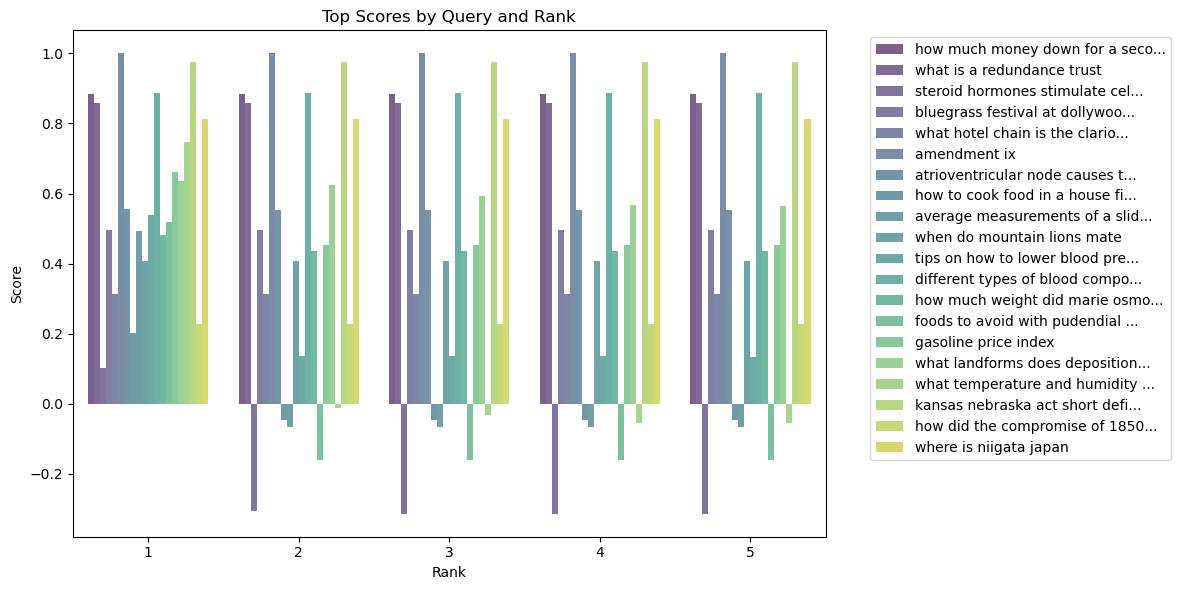

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='rank', y='score', hue='query', palette='viridis', alpha=0.7)
plt.title('Top Scores by Query and Rank')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


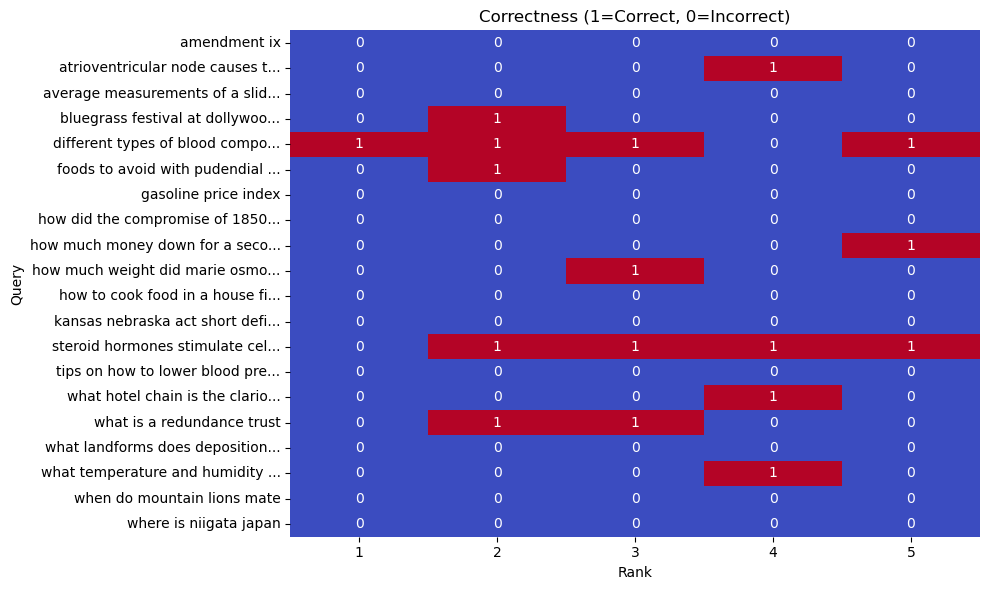

In [20]:
# Pivot for heatmap
heatmap_data = df.pivot_table(index='query', columns='rank', values='correct', aggfunc='first')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm', cbar=False)
plt.title('Correctness (1=Correct, 0=Incorrect)')
plt.xlabel('Rank')
plt.ylabel('Query')
plt.tight_layout()
plt.show()


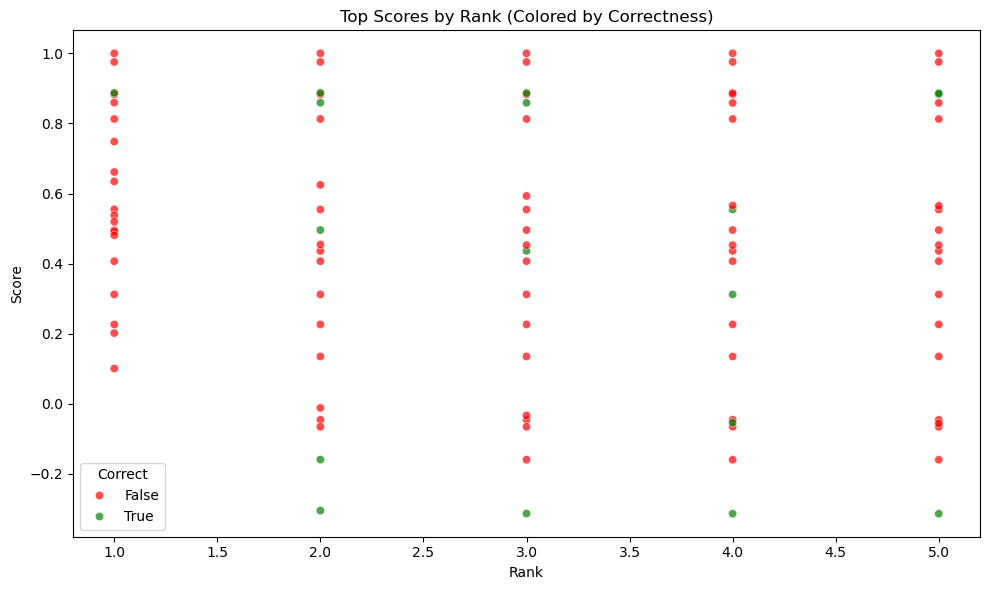

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rank', y='score', hue='correct', palette={True: 'green', False: 'red'}, alpha=0.7)
plt.title('Top Scores by Rank (Colored by Correctness)')
plt.xlabel('Rank')
plt.ylabel('Score')
plt.legend(title='Correct')
plt.tight_layout()
plt.show()
